In [1]:
#importing the required ibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Mall_Customers.csv')

In [3]:
df.shape

(200, 5)

In [4]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
X = df.iloc[:,[3,4]].values
#here we are only taking the Annual Income and spending score in consideration only

Now to find the optimal number of clusters we use the Within Clusters Sum of Squares (WCSS).
The formula for calculating WCSS is:

<img src="wcss.png" />

In [13]:
#using the elbow  method to find the number of clusters required for the following
from sklearn.cluster import KMeans
wscc = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wscc.append(kmeans.inertia_)

In [14]:
kmeans.inertia_
#default cluster value is 2


20736.679938924124

In [15]:
wscc
#Till the 5th cluster the values are decresing sharply but after that they are almost negligible .

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25095.703209997548,
 21830.041978049434,
 20736.679938924124]

Text(0, 0.5, 'WCSS value')

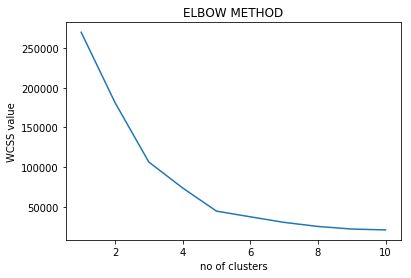

In [16]:
plt.plot(range(1,11),wscc)
plt.title('ELBOW METHOD')
plt.xlabel('no of clusters')
plt.ylabel('WCSS value')

In [17]:
#Applyng the KMean to the Mall Dataset
kmeans = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=0)
ymeans = kmeans.fit_predict(X)

<function matplotlib.pyplot.show(*args, **kw)>

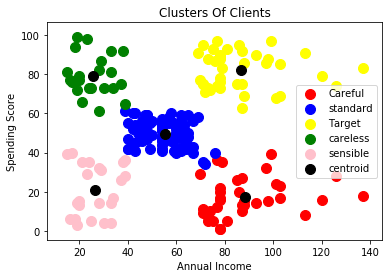

In [28]:
#The Labels that we are using here are based on the performance b/w the spendig score and annual income 
plt.scatter(X[ymeans==0,0],X[ymeans==0,1],s=100,c='red',label='Careful')
plt.scatter(X[ymeans==1,0],X[ymeans==1,1],s=100,c='blue',label='standard')
plt.scatter(X[ymeans==2,0],X[ymeans==2,1],s=100,c='yellow',label='Target')
plt.scatter(X[ymeans==3,0],X[ymeans==3,1],s=100,c='green',label='careless')
plt.scatter(X[ymeans==4,0],X[ymeans==4,1],s=100,c='pink',label='sensible')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='centroid')
plt.title('Clusters Of Clients')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show

GREAT WORK!!